# Class and functions for moving the robot

Import Statements

In [1]:
from typing import List
from math import sin, cos, radians
import matplotlib.pyplot as plot
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

Define skid steer robot

In [2]:
class SkidRobot:
    def __init__(self, length, width, x=0, y=0) -> None:
        """Creates a robot

        Args:
            length (_type_): Uses Meters
            width (_type_): Uses Meters
        """
        self.length = length
        self.width = width
        self.x = x
        self.y = y
        self.theta = 0
    
    def move(self, velocity_left, velocity_right, dt=0.1) -> None:
        self.x -= (.5 * (velocity_left + velocity_right)) * sin(radians(self.theta)) * dt
        self.y += (.5 * (velocity_left + velocity_right)) * cos(radians(self.theta)) * dt
        self.theta += (1 / self.width) * (velocity_right - velocity_left) * dt
        
    def get_coords(self) -> "tuple[float, float]":
        return (self.x, self.y)
    
    def move_for_duration(self, duration, velocity_left, velocity_right) -> "tuple[list, list]":
        path_x = []
        path_y = []
        
        # put loop in terms of dt = 0.1
        current_time = 0
        while (current_time < duration ):
            path_x.append(self.x)
            path_y.append(self.y)
            self.move(velocity_left, velocity_right)
            current_time += .1

        # Store final point
        path_x.append(self.x)
        path_y.append(self.y)
        return path_x, path_y

    def get_bounds(self) -> "tuple[float, float]":
        return (self.width, self.length)

# Question 1

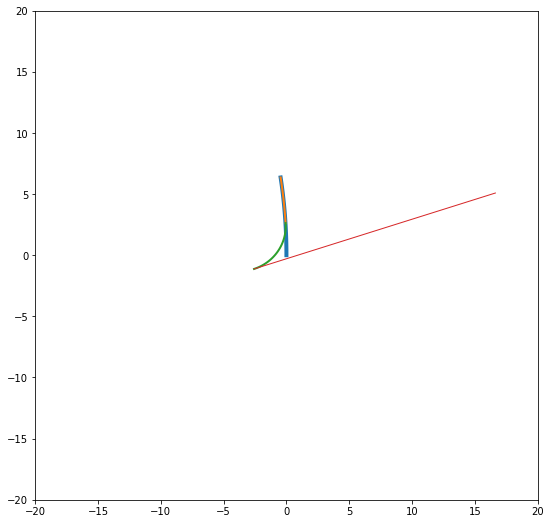

In [3]:
figure = plot.figure(figsize=(9,9))
axes = plot.axes(xlim=(-20,20), ylim=(-20,20))

robot = SkidRobot(.5, .3)

# Run robot
x0, y0 = robot.move_for_duration(5, 1, 1.5)
x1, y1 = robot.move_for_duration(3, -1, -1.5)
x2, y2 = robot.move_for_duration(8, .8, -2)
x3, y3 = robot.move_for_duration(10, 2, 2)

# Plot path
line0, = axes.plot(x0, y0, lw=4)
line1, = axes.plot(x1, y1, lw=2)
line2, = axes.plot(x2, y2, lw=2)
line3, = axes.plot(x3, y3, lw=1)

# Question 2: 5m x 5m box

Define plotting function

In [4]:
def plot_path_x_y_angular_velocities(path_x, path_y, angular_momentum) -> None:

    # Graph the path of the robot
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.set_xbound(0, 10)
    axes.set_ybound(0, 10)
    axes.set_title("Path")
    axes.add_patch(Rectangle((0, 0), 5, 5, facecolor="none", ec='k', lw=2))

    for index, path in enumerate(path_x):
        axes.plot(path_x[index], path_y[index], lw=4)

    # Flatten lists
    path_x = [item for sublist in path_x for item in sublist]
    path_y = [item for sublist in path_y for item in sublist]

    # Plot angular momentum by command (each command has constant angular momentum)
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(angular_momentum)
    axes.set_title("Angular Momentum")
    axes.set_xlabel("Command")

    # Plot x position by time
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(path_x, label="x")
    axes.set_xlabel("Time step")
    axes.set_title("Position X")

    # Plot y position by time
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(path_y, label="y")
    axes.set_xlabel("Time step")
    axes.set_title("Position Y")

Define function to get angular momentum

In [5]:
def get_angular_momentum(duration, velocity_left, velocity_right, robot) -> float:
    delta_theta = duration * ((velocity_right - velocity_left) / robot.width)
    return radians(delta_theta)

Create and run skid steer robot

In [6]:
robot = SkidRobot(.5, .3)

path_x = []
path_y = [] 
angular_momentum = []

# Move to starting position
duration, velocity_left, velocity_right = 0.3, 1, 1
sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

# Repeat coverage process
for _ in range(8):
    # Move to the end of the line
    duration, velocity_left, velocity_right = 4.4, 1, 1
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
    sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Turn -90 degrees in place
    duration, velocity_left, velocity_right = 2, 6.75, -6.75
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
    sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Move forward enough for coverage
    duration, velocity_left, velocity_right = 0.3, 1, 1
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
    sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Turn -90 degrees in place
    duration, velocity_left, velocity_right = 2, 6.75, -6.75
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
    sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Move to the end of the line
    duration, velocity_left, velocity_right = 4.4, 1, 1
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
    sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Turn 90 degrees in place
    duration, velocity_left, velocity_right = 2, -6.75, 6.75
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
    sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Move forward enough for coverage
    duration, velocity_left, velocity_right = 0.3, 1, 1
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
    sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Turn 90 degrees in place
    duration, velocity_left, velocity_right = 2, -6.75, 6.75
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
    sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

# Move to end position
duration, velocity_left, velocity_right = 4.4, 1, 1
sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

Graph the path, x, y, and angular momentum of Question 2

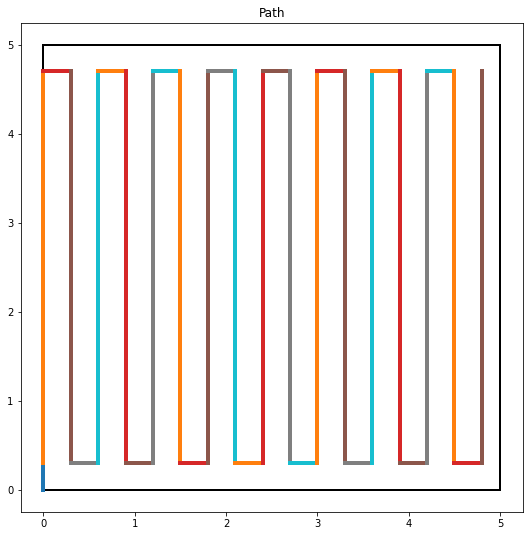

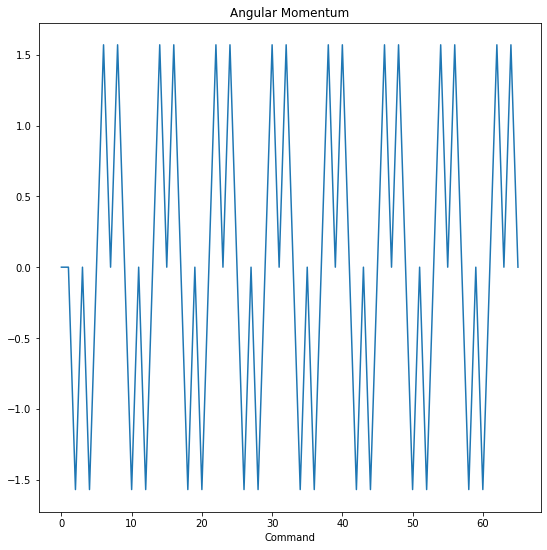

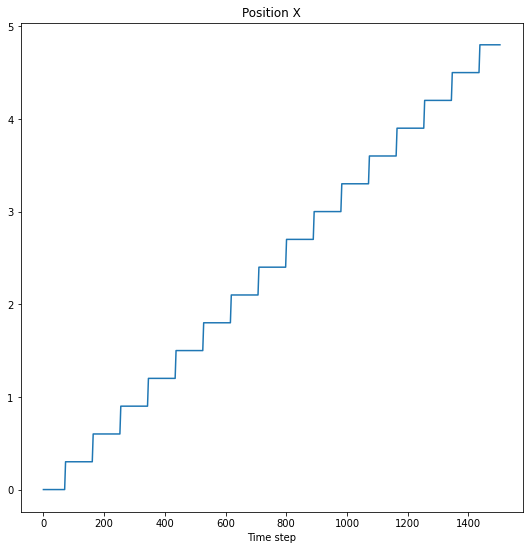

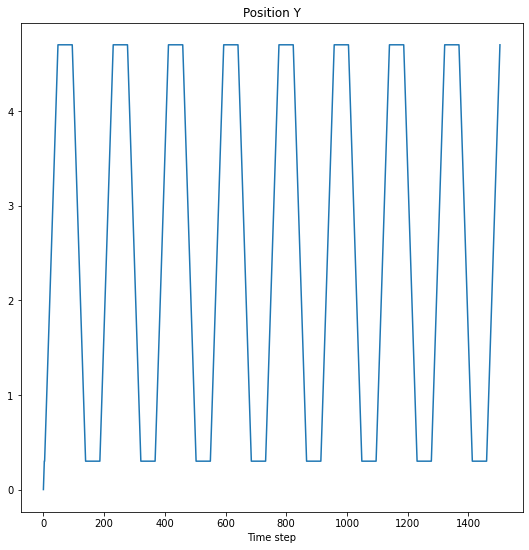

In [7]:
plot_path_x_y_angular_velocities(path_x, path_y, angular_momentum)

## Question 3 : Swedish

Define modified Skidrobot with Swedish wheels. 
It takes a direction and an overall velocity in contrast to the skid steer robot bot.

In [8]:
class SwedishRobot:
    def __init__(self, length, width, x=0, y=0) -> None:
        """Creates a robot

        Args:
            length (_type_): Uses Meters
            width (_type_): Uses Meters
        """
        self.length = length
        self.width = width
        self.x = x
        self.y = y
    
    def move(self, velocity, theta, dt=0.1) -> None:
        self.x -= (.5 * (velocity)) * sin(radians(theta)) * dt
        self.y += (.5 * (velocity)) * cos(radians(theta)) * dt
      
    def get_coords(self) -> "tuple[float, float]":
        return (self.x, self.y)
    
    def move_for_duration(self, duration, velocity, theta) -> "tuple[list, list]":
        path_x = []
        path_y = []
        
        # put loop in terms of dt = 0.1
        current_time = 0
        while (current_time < duration ):
            path_x.append(self.x)
            path_y.append(self.y)
            self.move(velocity, theta)
            current_time += .1

        # Store final point
        path_x.append(self.x)
        path_y.append(self.y)
        return path_x, path_y

    def get_bounds(self) -> "tuple[float, float]":
        return (self.width, self.length)

Define modified angular momentum function

In [9]:
def get_angular_momentum(duration, velocity, robot) -> None:
    delta_theta = duration * ((velocity) / robot.width)
    return radians(delta_theta)

Create and run swedish wheel robot

In [10]:
robot = SwedishRobot(.5, .3)

path_x = []
path_y = [] 
angular_momentum = []

# Move to starting position
duration, velocity = 0.3, 2 # Duration in seconds, velocity in m/s
sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity, 0)
sub_angular_momentum = get_angular_momentum(duration, velocity, robot)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

# Repeat coverage process
for _ in range(8):
    # Move to the end of the line
    duration, velocity = 4.4, 2
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity, 0)
    sub_angular_momentum = get_angular_momentum(duration, velocity, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)


    # Move forward enough for coverage
    duration, velocity = 0.3, 2
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity, -90)
    sub_angular_momentum = get_angular_momentum(duration, velocity, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Move to the end of the line
    duration, velocity = 4.4, 2
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity, 180)
    sub_angular_momentum = get_angular_momentum(duration, velocity, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)


    # Move forward enough for coverage
    duration, velocity = 0.3, 2
    sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity, -90)
    sub_angular_momentum = get_angular_momentum(duration, velocity, robot)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)


# Move to end position
duration, velocity = 4.4, 2
sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity, 0)
sub_angular_momentum = get_angular_momentum(duration, velocity, robot)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

Graph the path, x, y, and angular momentum of Question 3

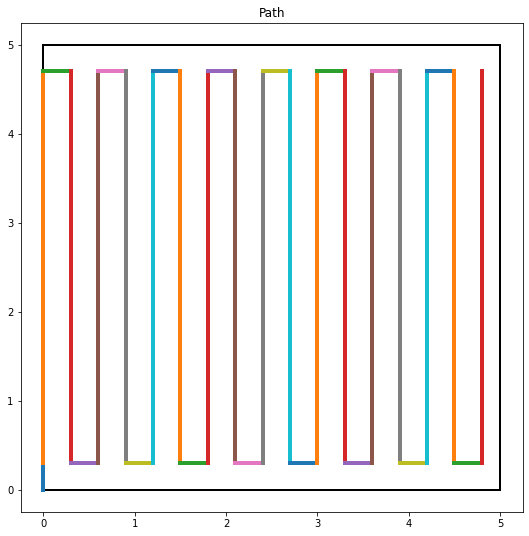

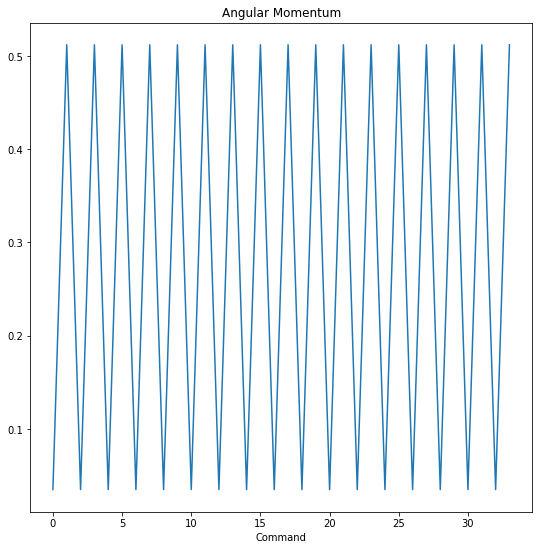

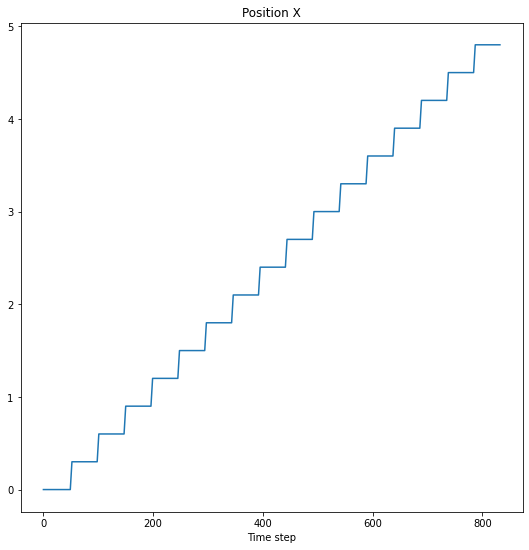

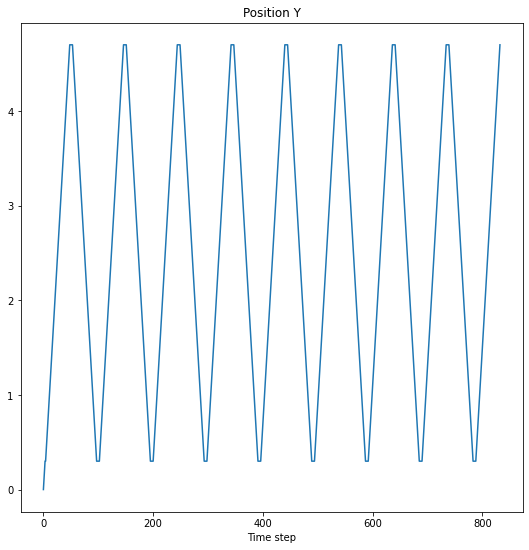

In [11]:
plot_path_x_y_angular_velocities(path_x, path_y, angular_momentum)